### Iris
**Neste notebook usaremos o modelo de árvore de decisão para classificar 3 classes de uma planta chamada iris**

## A árvore de decisão

- Conjunto de regras que criamos para tomar qualquer decisão.
- Para cada pergunta da árvore nós respondemos Sim ou Não, e essas perguntas nos guiam até a decisão final.
- Cada pergunta é chamada de `Nó de decisão`, sendo que o primeiro nó é chamado de `Nó raiz`, e o último `Nó folha`
<br><br>
<img src="https://drive.google.com/uc?id=1N_QBc2uvBp9KyOBDXPfqRFgqphTCwxpV" style="width: 300px;"/>

 - A árovre de decisão é uma representação, uma estrutura, e somente a árvore não é Aprendizado de máquina. Aprendizado de máquina é a escolha dessas regras para a criação da árvore.
 - Em resumo, a seleção dos nós é feita escolhendo qual recurso e qual limite vai tornar os próximos passos o mais homogêneo possível.
 
 - **`Importante`**: Como podemos criar vários nós para a árvore, é um modelo que pode sofrer facilmente overfitting. Que ao invés de aprender com os dados de treino, ele vai decorar os dados, assim indo mal no teste e com a entrada de novos dados.

- **Utilizando o dataset iris**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
    - Possui 3 classes de plantas da mesma espécie; ['setosa', 'versicolor', 'virginica']
    - 150 dados no total, 50 de cada tipo, classificadas como 0, 1, 2

In [5]:
# Importando o pandas
import pandas as pd

In [6]:
# Importando o dataset iris
from sklearn.datasets import load_iris


In [8]:
# Retornando os dados
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
# Transformando os dados em um DataFrame
df = pd.DataFrame(data.data)
df.columns = data.feature_names   # Colocando nome nas colunas
df['target'] = data.target  # Criando a coluna target, onde tem a resposta(o tipo da planta)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# 150 dados no total, 50 de cada tipo, classificadas como 0, 1, 2
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

Agora temos o dataset preparado para podermos trabalhar;<br><br>

Contudo vamos dividir e análisar somente as plantas com target 0 e 1<br>
Para facilitar a visualização<br>
Também iremos simplificar pegando só as colunas de largura e comprimento da pétala

In [24]:
# Pegando somente os dados com target 0 e 1, e pegando as colunas referentes a petala
iris = df.loc[df.target.isin([0, 1]),['petal length (cm)','petal width (cm)','target']]
iris.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [25]:
# Separando o x e o y. Onde x vai ser toda a base e o y será o target(a resposta)
x = iris.drop('target', axis=1)
y = iris.target

Agora vamos usar o `train_test_split`
para dividir os dados de treino e os dados de teste

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [26]:
# importando o train_test_split e separando os dados

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

**Podemos visualizar graficamente os dados de treino dessa base usando o matplotlib**
 - Usando o scatter plot
 - https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

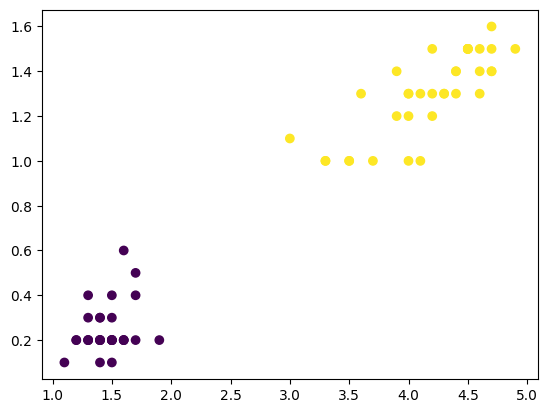

In [27]:
import matplotlib.pyplot as plt

# plot
fig, ax = plt.subplots()

# eixo x do gráfico vai ser os dados 'petal len' e o eixo y 'petal width' 
# os dados vão ser separados por cores diferentes com base no target de cada um
# ou seja target=0 vai ter uma cor / target=1 vai ter outra cor
ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c=y_train)


plt.show()

Agora usaremos a árvore de decisão para separar o que é 0 e o que é 1
 - Criando e treinando o modelo

- https://scikit-learn.org/stable/modules/tree.html

In [31]:
# Importando e criando o modelo de árvore de classificação

from sklearn import tree

modelo = tree.DecisionTreeClassifier() # Criando
modelo.fit(x_train, y_train)    # Treinando


DecisionTreeClassifier()

In [32]:
# Avaliando o quão perto ele chegou dos dados reais
modelo.score(x_train, y_train)

1.0

### Exibindo a árvore de decisão criada
 - https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html?highlight=plot_tree#sklearn.tree.plot_tree

,petal length (cm),petal width (cm)
28,1.4,0.2
93,3.3,1.0
5,1.7,0.4
66,4.5,1.5
65,4.4,1.4


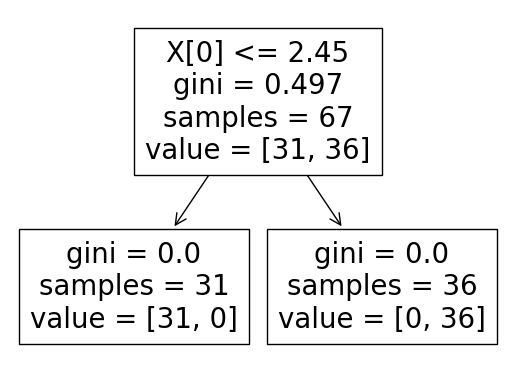

In [34]:
# X[0] = 'petal length (cm)'
tree.plot_tree(modelo)
x_train.head()

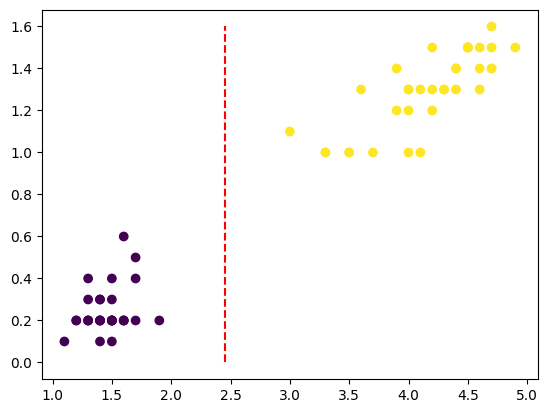

In [39]:
# Podemos adicionar essas regras no nosso gráfico

fig, ax = plt.subplots()

ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c=y_train)

# Reta passando em 2.45
ax.plot([2.45, 2.45], [0,1.6], '--r')

plt.show()

Essa foi a decisão feita se for menor que 2.45 vai estar a direita da reta será classificado como 0<br>
Se for maior que 2.45 vai estar a esquerda da reta e será classificado como 1.

In [40]:
# Fazendo a previsão e avaliando o modelo

# fazendo predict da variavel y, que é o target
y_pred = modelo.predict(x_test)

# importando matriz de confusão
from sklearn.metrics import confusion_matrix

# usando para comparar o y_test(com as reais respostas) com y_pred(com o que o modelo classificou)
confusion_matrix(y_test, y_pred)

# verdadeiro positivo,  falso negativo
# falso positivo, verdadeiro negativo

array([[19,  0],
       [ 0, 14]])

**O modelo acertou 100%**
- Pois o ideal é a diagonal principal com os verdadeiros positivos e negativos

Verificando os dados de TESTE


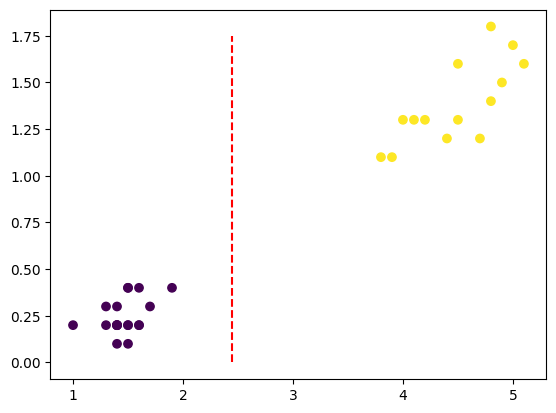

In [42]:
# Visualizando esses dados de teste
# x_test e y_test

fig, ax = plt.subplots()

ax.scatter(x_test['petal length (cm)'], x_test['petal width (cm)'], c=y_test)

# Reta passando em 2.45
ax.plot([2.45, 2.45], [0,1.75], '--r')

plt.show()


## **Agora vamos fazer o mesmo mas para o target 1 e 2**

In [43]:
# Selecionando apenas as colunas de pétalas com target 1 e 2
iris1 = df.loc[df.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']]
iris1.head()

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1


In [44]:
# Separando x e y

x = iris1.drop('target', axis=1)
y = iris1.target

In [45]:
# Separando o train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

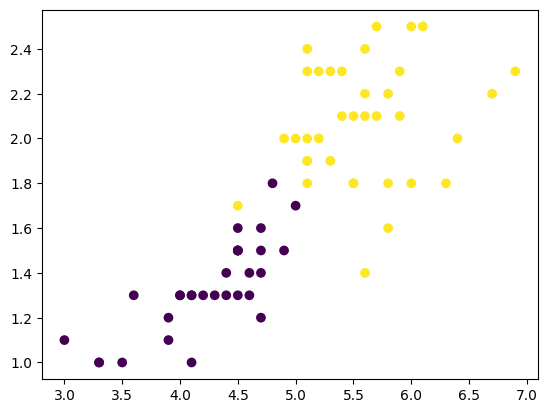

In [47]:
# Visualizando os dados de treino no matplotlib
fig, ax = plt.subplots()

ax.scatter(x_train['petal length (cm)'], 
           x_train['petal width (cm)'], 
           c=y_train)
plt.show()

Diferente dos targets 0 e 1, os dados 1 e 2 estão mais misturados

### Usando a árvore de classificação para classificar os dados

In [48]:
# Criando e treinando o segundo modelo

modelo2 = tree.DecisionTreeClassifier(random_state=42)
modelo2.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
# Verificando o score

modelo2.score(x_train,y_train)

1.0

**Exibindo a árvore de decisão criada**

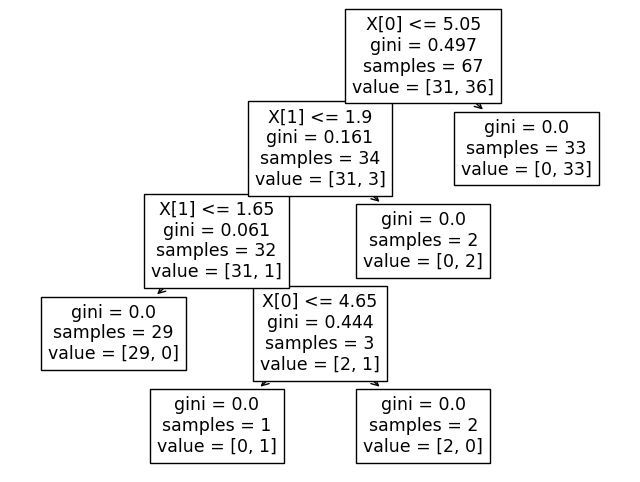

,petal length (cm),petal width (cm)
78,4.5,1.5
143,5.9,2.3
55,4.5,1.3
116,5.5,1.8
115,5.3,2.3


In [58]:
# alterando tamanho da figura
fig, ax = plt.subplots(figsize=(8, 6))
tree.plot_tree(modelo2)

plt.show()
x_train.head()

# X[0] = petal lengt 
# X[1] = petal width

Aqui vemos que a árvore teve um pouco mais de trabalho, fazendo mais verificações<br>
Mais perguntas tiveram que ser feitas para classificar todos os dados.

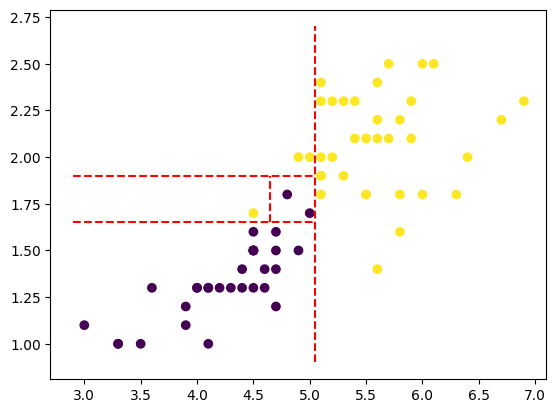

In [59]:
# Adicionando as regras da árvore no gráfico

fig, ax = plt.subplots()

ax.scatter(x_train['petal length (cm)'], 
           x_train['petal width (cm)'], 
           c=y_train)

# Reta passando em 5.05
ax.plot([5.05,5.05],[0.9,2.7],'--r')
ax.plot([2.9,5.05],[1.9,1.9],'--r') # Reta passando em X 2.9 ate 5.05 horizontal altura(y) 1.9
ax.plot([2.9,5.05],[1.65,1.65],'--r') # Reta passando em X  2.9 ate 5.05 horizontal altura(y) 1.65
ax.plot([4.65,4.65],[1.65,1.9],'--r') # Reta passando em X 4.65 vertical altura(y) 1.65 ate 1.9

plt.show()

O modelo acertou 100% na hora de separar os pontos de target diferente<br>
As linhas vermelhas são as decisões criadas. Se o eixo X é maior que 5.05 e etc;

**Avaliando o modelo com os dados de test**

In [67]:
# Fazendo a previsão e avaliando o erro
y_pred = modelo2.predict(x_test)

confusion_matrix(y_test,y_pred)

array([[18,  1],
       [ 6,  8]])

Ele acertou mais do que errou, porém agora não foi algo 100%<br>
Verificando os dados de test no gráfico

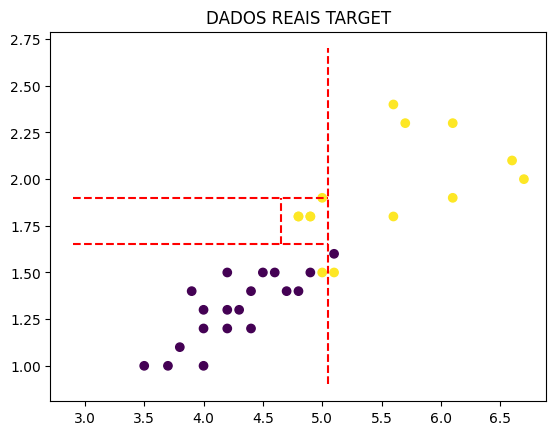

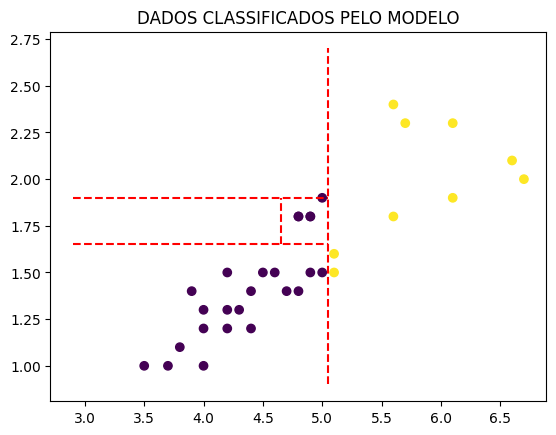

In [71]:
# Visualizando gráfico com os dados reais 
fig, ax = plt.subplots()
plt.title("DADOS REAIS TARGET")
ax.scatter(x_test['petal length (cm)'], 
           x_test['petal width (cm)'], 
           c=y_test)

ax.plot([5.05,5.05],[0.9,2.7],'--r')
ax.plot([2.9,5.05],[1.9,1.9],'--r')
ax.plot([2.9,5.05],[1.65,1.65],'--r')
ax.plot([4.65,4.65],[1.65,1.9],'--r')


plt.show()

# Visualizando o gráfico com os dados que O MODELO classificou
fig, ax = plt.subplots()
plt.title("DADOS CLASSIFICADOS PELO MODELO")
ax.scatter(x_test['petal length (cm)'], 
           x_test['petal width (cm)'], 
           c=y_pred)

ax.plot([5.05,5.05],[0.9,2.7],'--r')
ax.plot([2.9,5.05],[1.9,1.9],'--r')
ax.plot([2.9,5.05],[1.65,1.65],'--r')
ax.plot([4.65,4.65],[1.65,1.9],'--r')


plt.show()

Nota-se os erros, mesmo dentro do quadro onde só tem dados amarelo, deveriam ser roxos<br>
Dados passando a linha do 5.05 com target diferente.

# **Agora classificando a base toda com os targets 0, 1 , 2**

In [74]:
# Separando a base completa x e y

x = df.drop('target',axis=1)
y = df.target

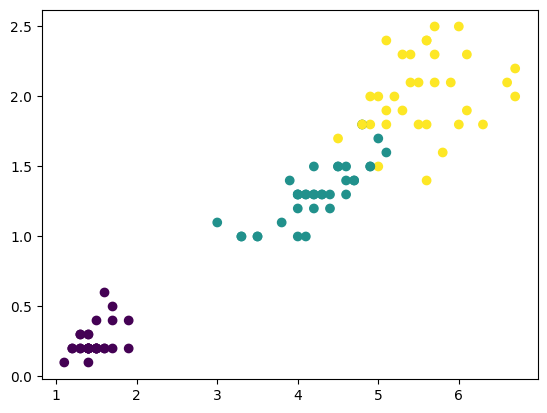

In [88]:
# Visualizando o gráfico com os dados de TREINO
fig, ax = plt.subplots()

ax.scatter(x_train['petal length (cm)'], 
           x_train['petal width (cm)'], 
           c=y_train)

plt.show()

Criando o modelo_completo para analisar a base toda

In [75]:
# Fazendo o train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [77]:
# Criando o classificador e fazendo o fit
modelo_completo = tree.DecisionTreeClassifier(random_state=42).fit(x_train,y_train)

In [79]:
# Verificando o score
modelo_completo.score(x_train,y_train)

1.0

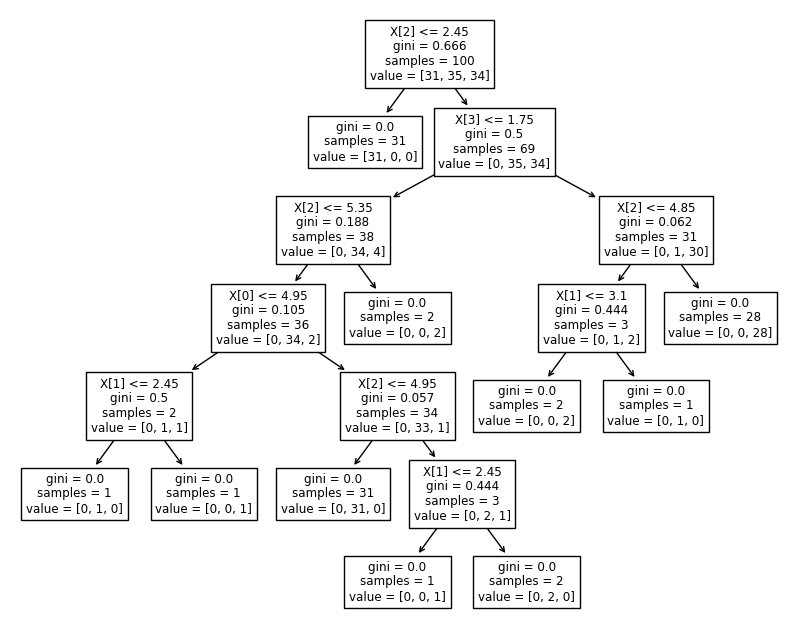

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [81]:
# Visualizando essa árvore
fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(modelo_completo)

plt.show()
x_test.head()

# X[0]= sepal length
# X[1]= sepal width
# X[2]= petal length
# X[3]= petal width

Aqui também tivemos muito mais perguntas para avaliar todos os dados<br>
Agora classificando-os como 0, 1, 2

In [84]:
# Fazendo a previsão
y_pred2 = modelo_completo.predict(x_test)

confusion_matrix(y_test, y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

Analisando o resultado da matriz confusão, vemos que ele só errou 1

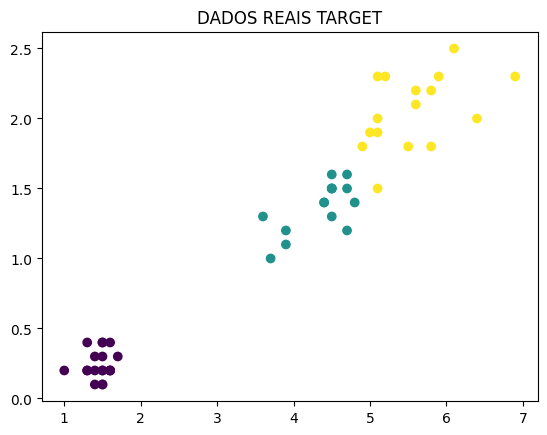

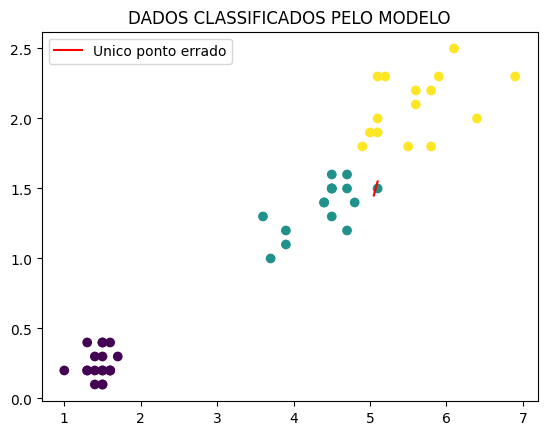

In [119]:
# Comparando o grafico com os dados REais com o grafico classificado pelo modelo_completo

# Visualizando gráfico com os dados reais 
fig, ax = plt.subplots()
plt.title("DADOS REAIS TARGET")
ax.scatter(x_test['petal length (cm)'], 
           x_test['petal width (cm)'], 
           c=y_test)



plt.show()

# Visualizando o gráfico com os dados que O MODELO classificou
fig, ax = plt.subplots()
plt.title("DADOS CLASSIFICADOS PELO MODELO")
ax.scatter(x_test['petal length (cm)'], 
           x_test['petal width (cm)'], 
           c=y_pred2)

plt.plot([5.05, 5.1], [1.45, 1.55], 'r', label='Unico ponto errado')
plt.legend()

plt.show()